In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import display
def all_cols(df):
    with pd.option_context('display.max_columns', None):
        return display(df)

## Monthly data

In [3]:
df_monthly = pd.read_csv(r'data/LL84_monthly/2020.csv')
df_monthly.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,Month,Electricity Use (kBtu),Natural Gas Use (kBtu)
0,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Jan-20,2175731.1,Not Available
1,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Feb-20,1902208.9,Not Available
2,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Mar-20,1847793.7,Not Available
3,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Apr-20,1613573.0,Not Available
4,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,May-20,1747078.0,Not Available


In [9]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334044 entries, 0 to 334043
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Property Id              334044 non-null  int64 
 1   Property Name            334044 non-null  object
 2   Parent Property Id       334044 non-null  object
 3   Parent Property Name     334044 non-null  object
 4   Month                    334044 non-null  object
 5   Electricity Use  (kBtu)  334044 non-null  object
 6   Natural Gas Use  (kBtu)  334044 non-null  object
dtypes: int64(1), object(6)
memory usage: 17.8+ MB


In [11]:
df_monthly.isna().sum()

Property Id                0
Property Name              0
Parent Property Id         0
Parent Property Name       0
Month                      0
Electricity Use  (kBtu)    0
Natural Gas Use  (kBtu)    0
dtype: int64

In [12]:
elec = df_monthly['Electricity Use  (kBtu)']
elec.value_counts()

Not Available    10960
0.0               1647
122832.0            85
136480.0            83
163776.0            82
                 ...  
94328.5              1
91429.6              1
115195.2             1
142455.2             1
41491.3              1
Name: Electricity Use  (kBtu), Length: 280898, dtype: int64

In [14]:
df_monthly[elec == 'Not Available']

,Property Id,Property Name,Parent Property Id,Parent Property Name,Month,Electricity Use (kBtu),Natural Gas Use (kBtu)
153,1160595,"STATEN ISLAND, NY-2463",Not Applicable: Standalone Property,Not Applicable: Standalone Property,Oct-20,Not Available,30057.0
154,1160595,"STATEN ISLAND, NY-2463",Not Applicable: Standalone Property,Not Applicable: Standalone Property,Nov-20,Not Available,88213.0
155,1160595,"STATEN ISLAND, NY-2463",Not Applicable: Standalone Property,Not Applicable: Standalone Property,Dec-20,Not Available,159018.0
13272,2263463,P&S - Black,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Jan-20,Not Available,Not Available
13273,2263463,P&S - Black,Not Applicable: Standalone Property,Not Applicable: Standalone Property,Feb-20,Not Available,Not Available
...,...,...,...,...,...,...,...
334039,17333571,110-31B Merrick Blvd,16804566,110-31 Merrick Boulevard,Aug-20,Not Available,Not Available
334040,17333571,110-31B Merrick Blvd,16804566,110-31 Merrick Boulevard,Sep-20,Not Available,Not Available
334041,17333571,110-31B Merrick Blvd,16804566,110-31 Merrick Boulevard,Oct-20,Not Available,Not Available
334042,17333571,110-31B Merrick Blvd,16804566,110-31 Merrick Boulevard,Nov-20,Not Available,Not Available


### drop buildings with no electricity use

In [17]:
df_monthly = df_monthly[elec != 'Not Available'].reset_index().copy()
df_monthly['Electricity Use  (kBtu)'] = df_monthly['Electricity Use  (kBtu)'].astype(float)

C:\Users\slitv\AppData\Local\Temp/ipykernel_4084/92611343.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_monthly = df_monthly[elec != 'Not Available'].reset_index().copy()


Seasonal electricity usage.

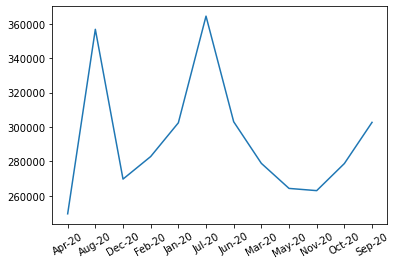

In [21]:
plt.plot(df_monthly.groupby('Month').mean()['Electricity Use  (kBtu)'])
plt.xticks(rotation = 30)
plt.show()
## TODO - order months

In [5]:
df_monthly.columns

Index(['Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'Month', 'Electricity Use  (kBtu)',
       'Natural Gas Use  (kBtu)'],
      dtype='object')

## Yearly Data

### Load data and initial EDA

In [3]:
df_yearly = pd.read_csv('data/LL84_yearly/2020.csv')

C:\Users\slitv\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (9,15,218,219) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_yearly.head()

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,...,Number of Active IT Meters,Generation Date,Release Date,Borough,Community Board,Council District,Census Tract,NTA,Longitude,Latitude
0,7365,1155,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,1009970029,1022631,1155 Avenue of the Americas,Manhattan,10036,...,0,05/20/2021 02:43:12 PM,05/20/2021 02:44:16 PM,MANHATTAN,105.0,4.0,119.0,Midtown-Midtown South,-73.982826,40.756631
1,8139,200,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,1013150001,1037545,200 East 42nd St.,Manhattan,10017,...,0,05/20/2021 02:43:12 PM,05/20/2021 02:44:16 PM,MANHATTAN,106.0,4.0,88.0,Turtle Bay-East Midtown,-73.974306,40.750698
2,8604,114,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,1009990019,1022667,114 West 47th st,Manhattan,10036,...,0,05/21/2021 04:10:56 PM,05/21/2021 04:13:00 PM,MANHATTAN,105.0,4.0,125.0,Midtown-Midtown South,-73.982504,40.758310
3,8841,733,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,1013190047,1037596,733 Third Avenue,Manhattan,10017,...,0,05/20/2021 02:43:13 PM,05/20/2021 02:44:16 PM,MANHATTAN,106.0,4.0,90.0,Turtle Bay-East Midtown,-73.972753,40.753074
4,11809,Conde Nast Building,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,1009950005,1085682,4 Times Square,Manhattan,10036,...,0,05/10/2021 06:30:37 PM,05/10/2021 06:34:54 PM,MANHATTAN,105.0,4.0,119.0,Midtown-Midtown South,-73.986244,40.756181


In [5]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28067 entries, 0 to 28066
Columns: 250 entries, Property Id to Latitude
dtypes: float64(6), int64(9), object(235)
memory usage: 53.5+ MB


In [6]:
df_yearly.columns.tolist()

['Property Id',
 'Property Name',
 'Parent Property Id',
 'Parent Property Name',
 'Year Ending',
 'NYC Borough, Block and Lot (BBL)',
 'NYC Building Identification Number (BIN)',
 'Address 1',
 'City',
 'Postcode',
 'Primary Property Type - Self Selected',
 'Primary Property Type - Portfolio Manager-Calculated',
 'National Median Reference Property Type',
 'List of All Property Use Types at Property',
 'Largest Property Use Type',
 'Largest Property Use Type - Gross Floor Area (ft²)',
 '2nd Largest Property Use Type',
 '2nd Largest Property Use - Gross Floor Area (ft²)',
 '3rd Largest Property Use Type',
 '3rd Largest Property Use Type - Gross Floor Area (ft²)',
 'Year Built',
 'Construction Status',
 'Number of Buildings',
 'Occupancy',
 'Metered Areas (Energy)',
 'Metered Areas (Water)',
 'ENERGY STAR Score',
 'National Median ENERGY STAR Score',
 'Target ENERGY STAR Score',
 'Reason(s) for No Score',
 'ENERGY STAR Certification - Year(s) Certified (Score)',
 'ENERGY STAR Certificat

### Filter to existing buildings

In [11]:
df_yearly['Construction Status'].value_counts()

Existing    28012
Test           48
Design          7
Name: Construction Status, dtype: int64

In [12]:
df_yearly.query('`Construction Status` == "Existing"', inplace=True)

### drop unneeded columns

In [9]:
missing_vals = df_yearly.isna().sum()
missing_vals[missing_vals > 0]

National Median Reference Property Type    536
Third Party Certification Date Achieved      1
Borough                                    981
Community Board                            989
Council District                           989
Census Tract                               989
NTA                                        989
Longitude                                  989
Latitude                                   989
dtype: int64

In [14]:
df_yearly['Metered Areas (Energy)'].value_counts()

Whole Property                                                                                                                          27062
Not Available                                                                                                                             896
Another configuration                                                                                                                      43
Common areas (all energy loads)                                                                                                             4
Common Area Plug Load/Electricity, Tenant Hot Water                                                                                         1
Common Area Hot Water, Common Area Cooling, Common Area Plug Load/Electricity, Tenant Hot Water, Common Area Heating, Tenant Heating        1
Common Area Cooling, Common Area Heating, Common Area Hot Water, Common Area Plug Load/Electricity, Tenant Heating, Tenant Hot Water        1
Tenant

In [15]:
df_yearly['Metered Areas (Water)'].value_counts()

Whole Property                                       20701
Not Available                                         7280
Another configuration                                   16
Common areas (all energy loads)                          8
Tenant and/or common areas (partial energy loads)        7
Name: Metered Areas (Water), dtype: int64

In [16]:
df_yearly['Propane Use (kBtu)'].value_counts()

Not Available    28009
0                    3
Name: Propane Use (kBtu), dtype: int64

In [18]:
drop_cols = [
    'Address 1', 'National Median Reference Property Type', 'City',
    'Construction Status', 'Propane Use (kBtu)'
] 
df_yearly.drop(columns = drop_cols, inplace=True)

### Property types

In [7]:
df_yearly['Primary Property Type - Self Selected']

0                         Office
1                         Office
2               Financial Office
3                         Office
4                         Office
                  ...           
28062    Senior Living Community
28063           Worship Facility
28064           Worship Facility
28065        Multifamily Housing
28066           Worship Facility
Name: Primary Property Type - Self Selected, Length: 28067, dtype: object

In [51]:
prop_type = 'Primary Property Type - Self Selected'
df_yearly[prop_type].value_counts()

Multifamily Housing           18733
Office                         2347
K-12 School                    1614
Hotel                           553
Non-Refrigerated Warehouse      454
                              ...  
Zoo                               2
Other - Services                  2
Ice/Curling Rink                  2
Bar/Nightclub                     1
Convention Center                 1
Name: Primary Property Type - Self Selected, Length: 75, dtype: int64

In [19]:
df_yearly.query('`Primary Property Type - Self Selected` != `Primary Property Type - Portfolio Manager-Calculated`')

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Postcode,Primary Property Type - Self Selected,Primary Property Type - Portfolio Manager-Calculated,...,Number of Active IT Meters,Generation Date,Release Date,Borough,Community Board,Council District,Census Tract,NTA,Longitude,Latitude
33,1273033,888 Seventh Ave,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,1010280029,1024895,10019,Office,Mixed Use Property,...,0,05/12/2021 04:54:59 PM,05/12/2021 04:55:43 PM,MANHATTAN,105.0,4.0,137.0,Midtown-Midtown South,-73.980416,40.765015
51,1418514,Kimmel,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,1-01443-0020,1044756,10065,Urgent Care/Clinic/Other Outpatient,Other - Specialty Hospital,...,0,04/05/2021 12:47:10 PM,04/05/2021 12:50:17 PM,MANHATTAN,108.0,5.0,118.0,Lenox Hill-Roosevelt Island,-73.959026,40.765740
425,1633736,X989-0201285,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,2031060028,2012934,10460,K-12 School,Other - Education,...,0,05/28/2021 05:13:45 PM,05/28/2021 05:29:28 PM,BRONX,206.0,17.0,371.0,East Tremont,-73.887151,40.844748
910,1836506,K808-0301558,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,3014540054,3039123,11233,K-12 School,Office,...,0,05/28/2021 05:12:08 PM,05/28/2021 05:29:28 PM,BROOKLYN,316.0,41.0,36501.0,Ocean Hill,-73.912024,40.673138
998,1836745,K997-0301717,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,3067390077,3180747,11230,K-12 School,Office,...,0,05/28/2021 05:12:42 PM,05/28/2021 05:29:28 PM,BROOKLYN,314.0,48.0,538.0,Midwood,-73.955115,40.618915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27748,16729651,138-12 Northern Boulevard,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,4-05010-0024,4113290,11354,Multifamily Housing,Mixed Use Property,...,0,07/28/2021 02:01:23 PM,07/28/2021 02:02:21 PM,QUEENS,407.0,20.0,865.0,Flushing,-73.827652,40.764026
27750,16732050,755 Bedford Ave,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,3017150019,3396820,11205,Mixed Use Property,Multifamily Housing,...,0,07/19/2021 11:35:28 AM,07/19/2021 11:35:45 AM,BROOKLYN,303.0,33.0,1237.0,Bedford,-73.956803,40.697949
27751,16732067,765 Bedford Ave,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,3017150014,3425028,11205,Mixed Use Property,Multifamily Housing,...,0,07/26/2021 10:45:13 AM,07/26/2021 10:45:34 AM,BROOKLYN,303.0,33.0,1237.0,Bedford,-73.956757,40.697716
27752,16732069,Lester Kehoe,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,5-01107-0055,5107089,10303,Mixed Use Property,Other,...,0,07/19/2021 09:50:53 AM,07/19/2021 09:52:22 AM,STATEN IS,501.0,49.0,223.0,Mariner's Harbor-Arlington-Port Ivory-Granitev...,-74.147351,40.637538


In [52]:
eui = 'Site EUI (kBtu/ft²)'
df_yearly[eui].value_counts()

Not Available    839
0                 61
65.4              55
84.3              53
63.7              49
                ... 
147.3              1
189.2              1
231.6              1
142.2              1
3586.8             1
Name: Site EUI (kBtu/ft²), Length: 2440, dtype: int64

In [53]:
df_yearly.replace({eui: {'Not Available': None}}, inplace=True)
df_yearly.dropna(subset = [eui], inplace=True)
df_yearly[eui] = df_yearly[eui].astype(float)

In [54]:
df_yearly[eui].value_counts()

0.0       61
65.4      55
84.3      53
63.7      49
78.8      48
          ..
147.3      1
189.2      1
231.6      1
142.2      1
3586.8     1
Name: Site EUI (kBtu/ft²), Length: 2439, dtype: int64

In [85]:
df_yearly.loc[df_yearly[prop_type] == "Senior Care Community", eui]

1326        129.7
1333        103.8
1495        239.2
3374        116.5
3483        179.7
4856        167.1
5079         65.6
5080        157.3
5159        125.9
5161         91.8
7057        103.0
7270        186.6
7935        176.9
7948        148.0
7951        132.2
9892         89.3
11103         9.0
11300       201.2
12864       134.2
14906       297.6
19071       273.1
19072       125.3
19073    152022.8
23028        61.6
23132       118.2
24878       130.7
24880       120.3
24881       101.3
25354       237.6
Name: Site EUI (kBtu/ft²), dtype: float64

In [88]:
df_yearly.loc[19073, :]

Property Id                                                       6720128
Property Name           Bronx Gardens Rehab and Nursing Center - 2175 ...
Parent Property Id                    Not Applicable: Standalone Property
Parent Property Name                  Not Applicable: Standalone Property
Year Ending                                                    12/31/2020
                                              ...                        
Council District                                                     15.0
Census Tract                                                      37504.0
NTA                                                          East Tremont
Longitude                                                      -73.890409
Latitude                                                        40.852341
Name: 19073, Length: 250, dtype: object

In [68]:
prop_gb = df_yearly[[eui, prop_type]].groupby(by = prop_type)
prop_type_table = prop_gb.agg([np.mean, len])
prop_type_table[prop_type_table[(eui, 'len')] >= 10]
prop_type_table[prop_type_table[(eui, 'len')] >= 10].sort_values(by = (eui, 'mean'), ascending= False)

Site EUI (kBtu/ft²)       
                                                                mean    len
Primary Property Type - Self Selected                                      
Senior Care Community                                    5380.879310     29
Laboratory                                                519.566667     21
Wastewater Treatment Plant                                271.842857     14
Other - Specialty Hospital                                254.414286     21
Hospital (General Medical & Surgical)                     244.719737     76
Other - Technology/Science                                236.332143     56
Supermarket/Grocery Store                                 212.270513     78
College/University                                        147.677778    243
Urgent Care/Clinic/Other Outpatient                       145.505085     59
Police Station                                            144.893333     90
Repair Services (Vehicle, Shoe, Locksmith, etc.)          134.074803    127
Other - Mall                                              132.900000     12
Residential Care Facility                                 132.090265    113
Senior Living Community                                   127.109524    105
Other - Recreation                                        126.900000     14
Fitness Center/Health Club/Gym                            125.939130     69
Medical Office                                            115.035922    103
Fire Station                                              111.926415     53
Museum                                                    111.565854     41
Other - Lodging/Residential                               109.195146    103
Wholesale Club/Supercenter                                109.015385     13
Outpatient Rehabilitation/Physical Therapy                106.570588     17
Strip Mall                                                100.426582     79
Manufacturing/Industrial Plant                            100.276945    347
Other                                                      97.164706     51
Other - Entertainment/Public Assembly                      95.066667     21
Mixed Use Property                                         90.847964    221
Financial Office                                           89.613793     29
Hotel                                                      89.426497    551
Enclosed Mall                                              87.233333     21
Social/Meeting Hall                                        86.000000     55
Retail Store                                               83.049169    301
Multifamily Housing                                        82.475209  18325
Courthouse                                                 82.096000     25
Library                                                    79.533019    106
Performing Arts                                            73.230303     66
Adult Education                                            72.553846     13
Movie Theater                                              71.710000     20
Office                                                     69.917952   2295
Automobile Dealership                                      69.045833     24
Residence Hall/Dormitory                                   66.823858    197
Bank Branch                                                65.390000     10
K-12 School                                                61.285117   1579
Refrigerated Warehouse                                     59.794286     35
Pre-school/Daycare                                         52.197810    137
Worship Facility                                           50.499497    199
Non-Refrigerated Warehouse                                 46.288532    436
Parking                                                    45.923077    130
Distribution Center                                        44.457233    159
Self-Storage Facility                                      21.725726    241

In [75]:
ghg_total = 'Total GHG Emissions (Metric Tons CO2e)'
df_yearly[ghg_total] = df_yearly[ghg_total].replace({'Not Available': 0}).astype(float)

In [77]:
prop_gb = df_yearly[[ghg_total, prop_type]].groupby(by = prop_type)
prop_type_table = prop_gb.agg([sum, len])
prop_type_table[prop_type_table[(ghg_total, 'len')] >= 10]
prop_type_table[prop_type_table[(ghg_total, 'len')] >= 10].sort_values(by = (ghg_total, 'sum'), ascending= False)

Total GHG Emissions (Metric Tons CO2e)  \
                                                                                    sum   
Primary Property Type - Self Selected                                                     
Multifamily Housing                                                           9634473.0   
Senior Care Community                                                         4282207.6   
Office                                                                        2921983.1   
Hospital (General Medical & Surgical)                                          859730.0   
K-12 School                                                                    718874.1   
College/University                                                             650218.8   
Hotel                                                                          450306.5   
Mixed Use Property                                                             298309.0   
Manufacturing/Industrial Plant                                                 258784.5   
Wastewater Treatment Plant                                                     215267.8   
Other - Specialty Hospital                                                     211056.5   
Laboratory                                                                     196671.6   
Financial Office                                                               174831.1   
Retail Store                                                                   147284.6   
Senior Living Community                                                        103597.7   
Non-Refrigerated Warehouse                                                     101543.8   
Other - Technology/Science                                                     101522.9   
Medical Office                                                                  97381.7   
Other                                                                           92699.3   
Repair Services (Vehicle, Shoe, Locksmith, etc.)                                88530.2   
Residential Care Facility                                                       78770.5   
Residence Hall/Dormitory                                                        74592.1   
Supermarket/Grocery Store                                                       61078.2   
Museum                                                                          60111.3   
Enclosed Mall                                                                   56192.0   
Urgent Care/Clinic/Other Outpatient                                             52726.9   
Distribution Center                                                             49159.6   
Police Station                                                                  44016.1   
Courthouse                                                                      42367.9   
Strip Mall                                                                      40962.1   
Performing Arts                                                                 39678.8   
Other - Lodging/Residential                                                     39496.3   
Self-Storage Facility                                                           34835.0   
Worship Facility                                                                32601.5   
Fitness Center/Health Club/Gym                                                  25926.8   
Library                                                                         20279.2   
Other - Entertainment/Public Assembly                                           17462.8   
Parking                                                                         16802.0   
Pre-school/Daycare                                                              15045.2   
Social/Meeting Hall                                                             14237.4   
Outpatient Rehabilitation/Physical Therapy                                      12253.6   
Wholesale Club/Supercenter                   

In [92]:
steam = 'District Steam Use (kBtu)'
df_yearly[steam].replace({'Not Available': 0}).astype(float).sort_values(ascending=False)

19073    6.381930e+10
27896    9.824232e+08
25159    4.061576e+08
1138     3.182731e+08
7997     2.723932e+08
             ...     
9703     0.000000e+00
9702     0.000000e+00
24871   -4.462630e+04
5       -4.039800e+08
6       -6.001336e+08
Name: District Steam Use (kBtu), Length: 27228, dtype: float64

In [98]:
df_yearly[df_yearly['Property Name'].str.startswith('NYP ')]

,Property Id,Property Name,Parent Property Id,Parent Property Name,Year Ending,"NYC Borough, Block and Lot (BBL)",NYC Building Identification Number (BIN),Address 1,City,Postcode,...,Number of Active IT Meters,Generation Date,Release Date,Borough,Community Board,Council District,Census Tract,NTA,Longitude,Latitude
5,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),12/31/2020,1-02138-0040; 1-02138-0030; 1-02139-0001; 1-02...,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,New York,10032,...,0,04/20/2021 02:47:36 PM,04/20/2021 03:06:18 PM,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,28402,NYP Cornell (East Campus),28402,NYP Cornell (East Campus),12/31/2020,1-01480-0001; 1-01482-0040,1084781; 1084780; 1081252,525 East 68th Street,New York,10021,...,0,07/27/2021 10:59:45 AM,07/27/2021 11:01:16 AM,MANHATTAN,108.0,5.0,116.0,Lenox Hill-Roosevelt Island,-73.955251,40.764149
4027,2793804,NYP Lower Manhattan,Not Applicable: Standalone Property,Not Applicable: Standalone Property,12/31/2020,1-00100-0001,1001352,170 William St,New York,10038,...,0,04/20/2021 02:47:37 PM,04/20/2021 03:06:18 PM,MANHATTAN,101.0,1.0,1501.0,Battery Park City-Lower Manhattan,-74.005515,40.710479


In [93]:
df_yearly.iloc[5, :]

Property Id                                  28400
Property Name           NYP Columbia (West Campus)
Parent Property Id                           28400
Parent Property Name    NYP Columbia (West Campus)
Year Ending                             12/31/2020
                                   ...            
Council District                               NaN
Census Tract                                   NaN
NTA                                            NaN
Longitude                                      NaN
Latitude                                       NaN
Name: 5, Length: 250, dtype: object

In [94]:
df_yearly.iloc[6, :]

Property Id                                   28402
Property Name             NYP Cornell (East Campus)
Parent Property Id                            28402
Parent Property Name      NYP Cornell (East Campus)
Year Ending                              12/31/2020
                                   ...             
Council District                                5.0
Census Tract                                  116.0
NTA                     Lenox Hill-Roosevelt Island
Longitude                                -73.955251
Latitude                                  40.764149
Name: 6, Length: 250, dtype: object